In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/fake_job_postings.csv')

In [3]:
print(df.shape)
df.head()

(17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.duplicated().any()

np.False_

In [6]:
# some unused column and columns with very high nulls, we need to drop them

unused_column = ['job_id', 'department', 'salary_range']

df2 = df.drop(unused_column, axis=1)
print(df2.shape)
df2.head()

(17880, 15)


,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# parse column location to make it easier to process further
df2['location'] = df2['location'].fillna('Unknown, Unknown, Unknown')

# Then split
df2[['country', 'state', 'city']] = df2['location'].str.split(', ', expand=True, n=2)

df2.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,,Auckland
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [8]:
df2.isnull().sum()

title                     0
location                  0
company_profile        3308
description               1
requirements           2696
benefits               7212
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
country                   0
state                    94
city                     94
dtype: int64

In [9]:
df3 = df2.drop('location', axis=1)

df3[['state', 'city']] = df3[['state', 'city']].fillna('Unknown')
df3.isnull().sum()

title                     0
company_profile        3308
description               1
requirements           2696
benefits               7212
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
country                   0
state                     0
city                      0
dtype: int64

## Explore the Data
Let's explor initial findings in this dataset 

In [10]:
data =df3
data['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

Data has very high imbalance in target, so we need to resampling here

In [11]:
data.nunique()

title                  11231
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
country                   91
state                    326
city                    2389
dtype: int64

In [12]:
fake_data = data[data['fraudulent']==1]
real_data = data[data['fraudulent']==0]

In [13]:
import re
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(column, data, colormap=None):

    text = ' '.join(data[column].astype(str).tolist())

    text = re.sub(r'[^A-Za-z\s]', '', text)

    text = text.lower()

    stopwords = set(STOPWORDS)
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    if colormap:
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate(text)
    else:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    return wordcloud

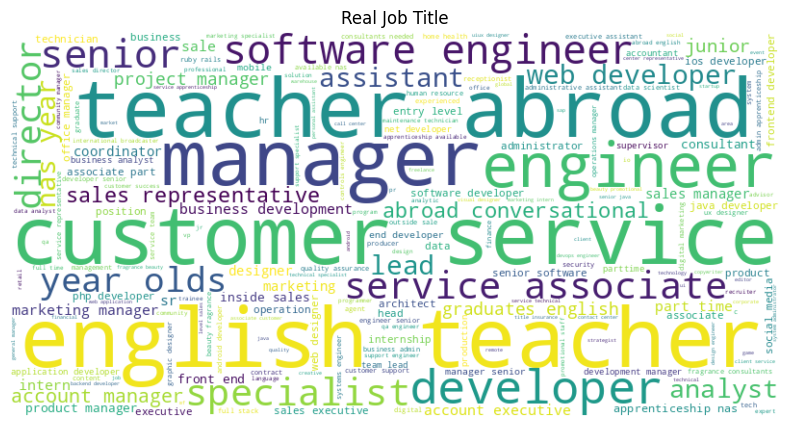

In [14]:
wordcloud = generate_wordcloud('title', real_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Real Job Title")
plt.show()

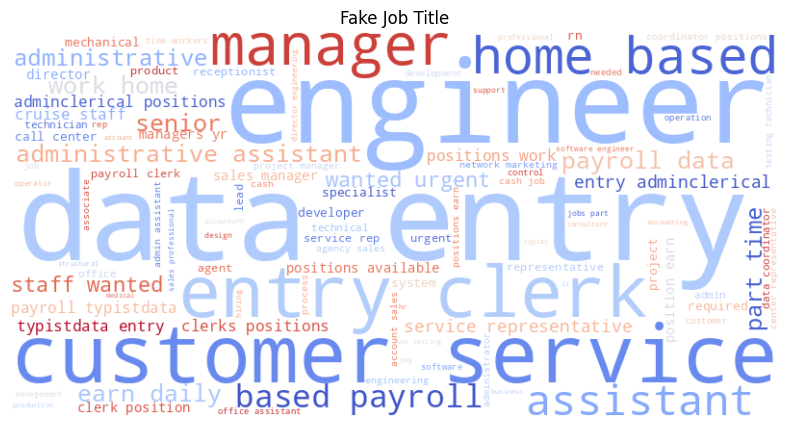

In [15]:
wordcloud = generate_wordcloud('title', fake_data, colormap=True)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Fake Job Title")
plt.show()

#### Company Profile Wordcloud

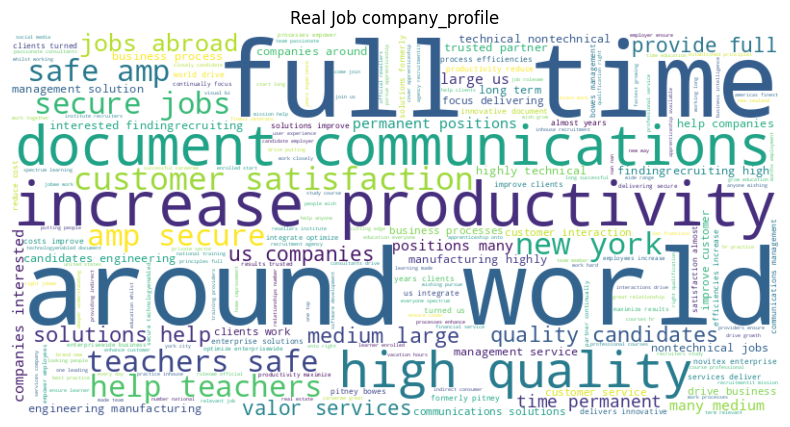

In [16]:
wordcloud = generate_wordcloud('company_profile', real_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Real Job company_profile")
plt.show()

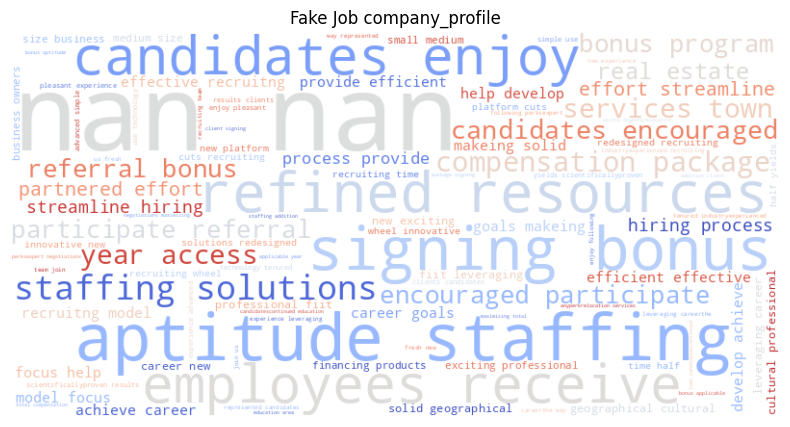

In [17]:
wordcloud = generate_wordcloud('company_profile', fake_data, colormap=True)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Fake Job company_profile")
plt.show()

#### Job Description Wordcloud

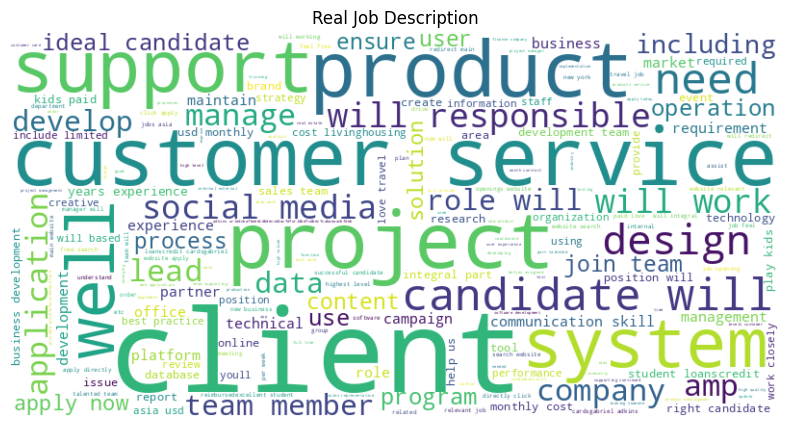

In [18]:
wordcloud = generate_wordcloud('description', real_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Real Job Description")
plt.show()

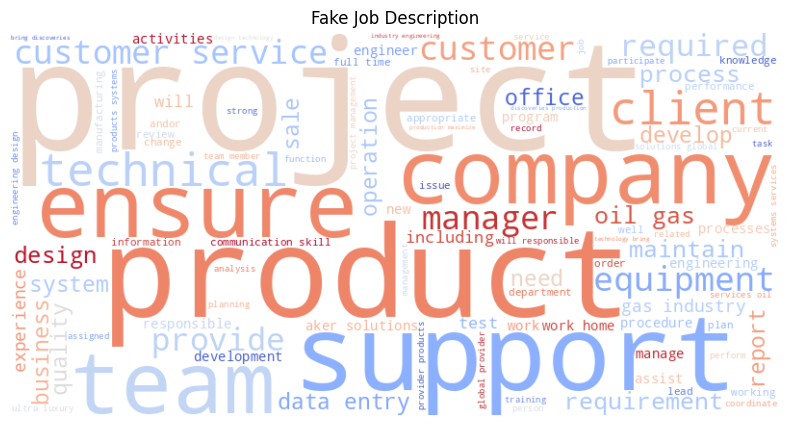

In [19]:
wordcloud = generate_wordcloud('description', fake_data, colormap=True)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Fake Job Description")
plt.show()

#### Job Requirements Wordcloud

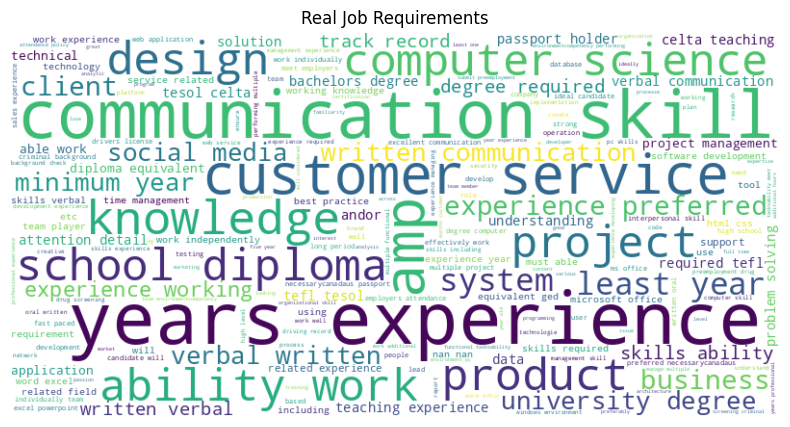

In [20]:
wordcloud = generate_wordcloud('requirements', real_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Real Job Requirements")
plt.show()

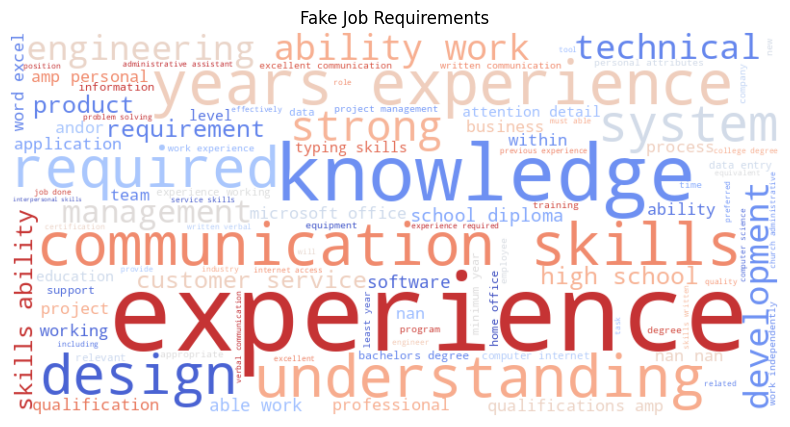

In [21]:
wordcloud = generate_wordcloud('requirements', fake_data, colormap=True)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Fake Job Requirements")
plt.show()

#### Job Benefit Wordcloud

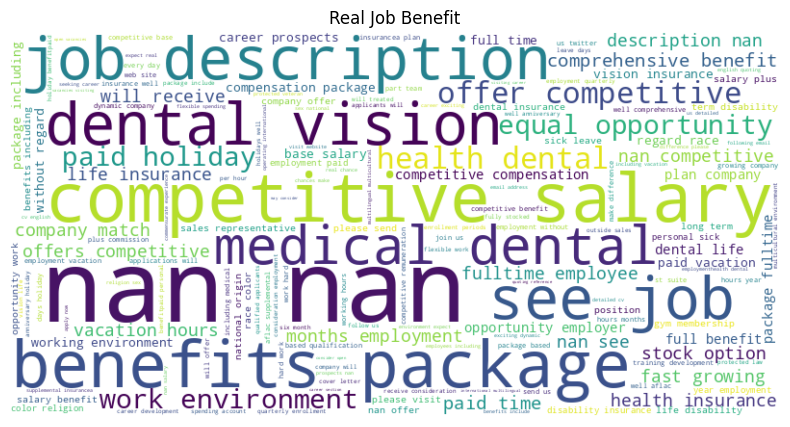

In [22]:
wordcloud = generate_wordcloud('benefits', real_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Real Job Benefit")
plt.show()

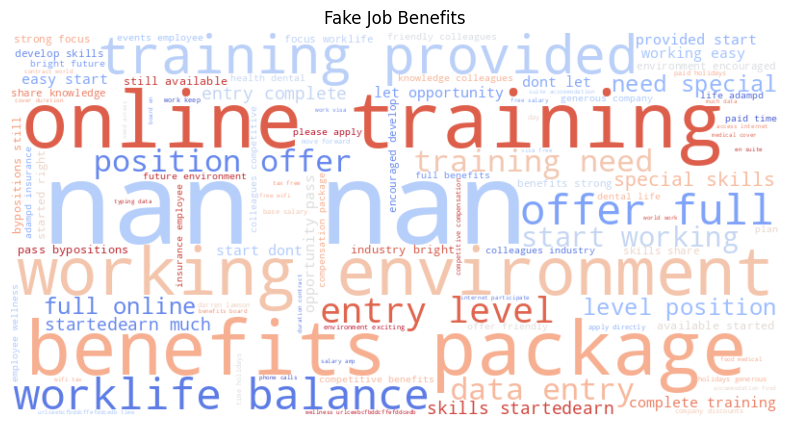

In [23]:
wordcloud = generate_wordcloud('benefits', fake_data, colormap=True)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Fake Job Benefits")
plt.show()

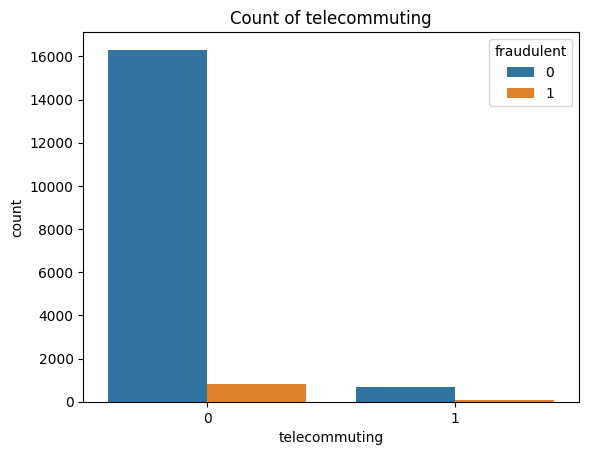

In [24]:
sns.countplot(x='telecommuting', hue='fraudulent', data=data)

plt.title("Count of telecommuting")
plt.show()

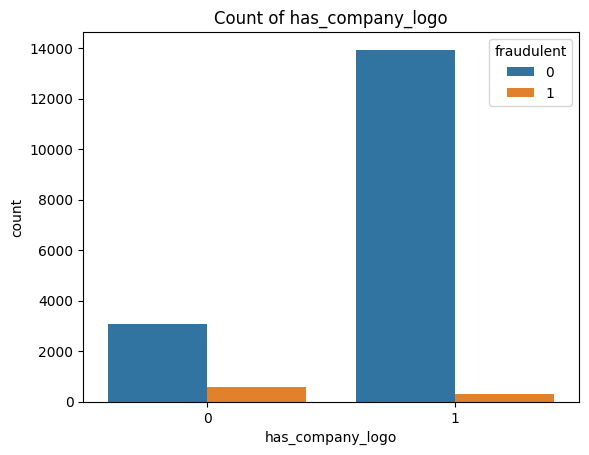

In [25]:
sns.countplot(x='has_company_logo', hue='fraudulent', data=data)

plt.title("Count of has_company_logo")
plt.show()

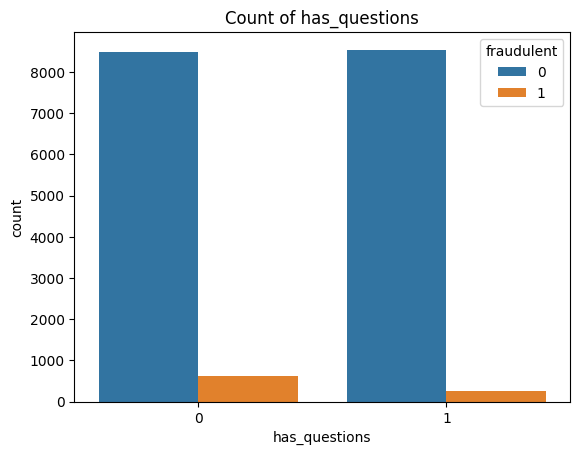

In [26]:
sns.countplot(x='has_questions', hue='fraudulent', data=data)

plt.title("Count of has_questions")
plt.show()

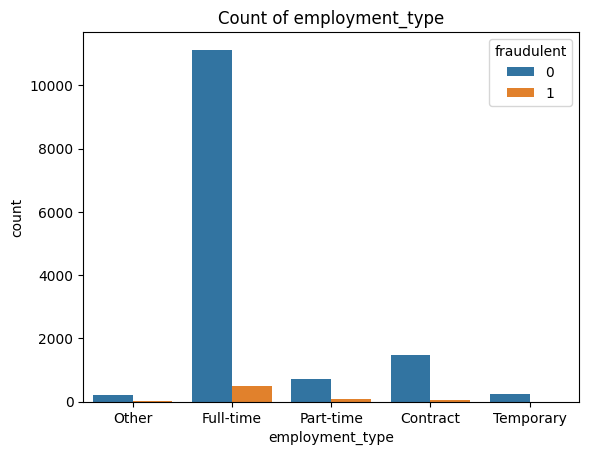

In [27]:
sns.countplot(x='employment_type', hue='fraudulent', data=data)

plt.title("Count of employment_type")
plt.show()

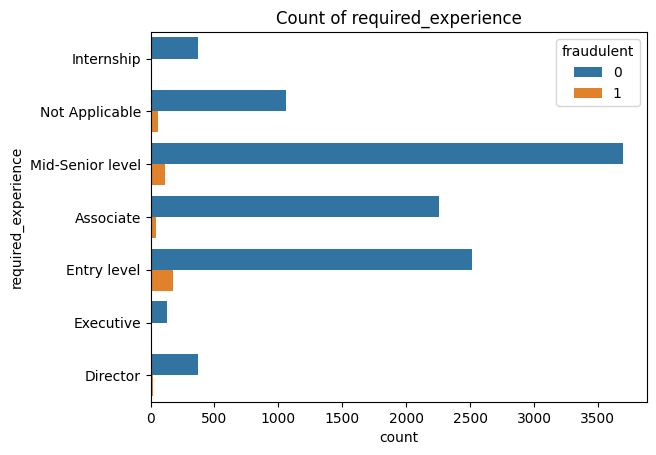

In [28]:
sns.countplot(y='required_experience', hue='fraudulent', data=data)

plt.title("Count of required_experience")
plt.show()

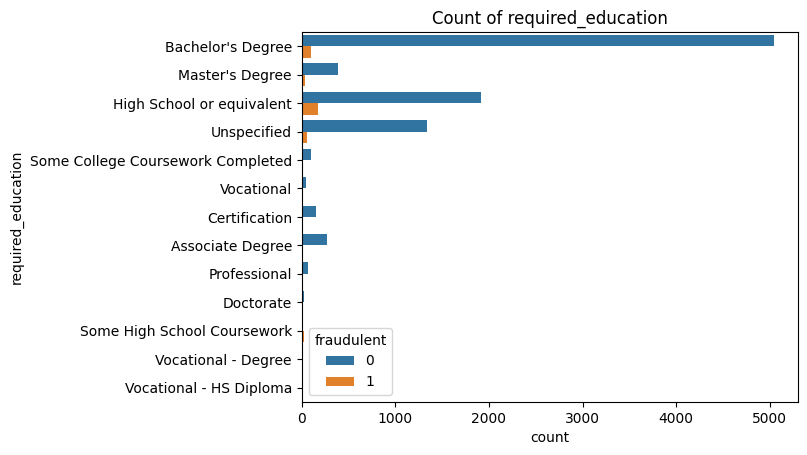

In [29]:
sns.countplot(y='required_education', hue='fraudulent', data=data)

plt.title("Count of required_education")
plt.show()

Most of fake job postings targeting entry level roles and lower education level

## Continue Cleaning Data

In [30]:
df3.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,,Auckland
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [31]:
df3.nunique()

title                  11231
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
country                   91
state                    326
city                    2389
dtype: int64

In [32]:
df3['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [33]:
df4 = df3.copy()

In [34]:
df4.isnull().sum()

title                     0
company_profile        3308
description               1
requirements           2696
benefits               7212
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
country                   0
state                     0
city                      0
dtype: int64

In [35]:
df4[['employment_type', 'required_experience', 'required_education', 'industry', 'function']] = df4[['employment_type', 'required_experience', 'required_education', 'industry', 'function']].fillna('Unknown')

In [36]:
df4[['state', 'city']] = df4[['state', 'city']].replace('', 'Unknown')

In [37]:
df4['benefits'].replace('', np.nan, inplace=True)

df4['company_profile'] = df4['company_profile'].fillna('No company profile provided')
df4['requirements'] = df4['requirements'].fillna('No requirements specified')
df4['benefits'] = df4['benefits'].fillna('No benefits listed')

C:\Users\Asus\AppData\Local\Temp\ipykernel_15092\4066805172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['benefits'].replace('', np.nan, inplace=True)


In [38]:
df4['industry'].value_counts()

industry
Unknown                                4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Sporting Goods                            1
Museums and Institutions                  1
Shipbuilding                              1
Alternative Dispute Resolution            1
Ranching                                  1
Name: count, Length: 132, dtype: int64

In [39]:
df4.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No benefits listed,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0,US,NY,New York
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,NZ,Unknown,Auckland
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,No benefits listed,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0,US,IA,Wever
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [40]:
df4['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [41]:
df4.isnull().sum()

title                  0
company_profile        0
description            1
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
state                  0
city                   0
dtype: int64

In [42]:
df4.dropna(inplace=True)

In [43]:
df5 = df4.drop_duplicates()

In [45]:
df5.to_csv('../../data/interim/cleaned_fake_job_dataset.csv', index=False)